# impirting necessary library

In [74]:
import numpy as np                  # for acessing array elements
import pandas as pd                 #for manipulating large amount of dataset
import matplotlib.pyplot as plt     # for visualizing
import seaborn as sns
import tensorflow as tf               #for building model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Load and Explore the Data

In [75]:
df=pd.read_csv('/content/unclean_smartwatch_health_data.csv')

print(df.head()) # Show first 5 rows


   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  


In [76]:
print(df.info()) # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB
None


In [77]:
print(df.describe())# Summary statistics

           User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count
count  9799.000000       9600.000000             9700.000000   9900.000000
mean   3007.480253         76.035462               97.841581   6985.685885
std    1150.581542         19.412483                1.732863   6885.809680
min    1001.000000         40.000000               90.791208      0.910138
25%    1997.500000         64.890152               96.662683   2021.039657
50%    2998.000000         75.220601               98.010642   4962.534599
75%    4004.000000         85.198249               99.376179   9724.902880
max    4999.000000        296.593970              100.000000  62486.690753


# Data pre processing

Handle Missing Values & Outliers

In [78]:
# Convert 'Sleep Duration (hours)' to numeric, forcing errors to NaN
df['Sleep Duration (hours)']=pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')

In [79]:
# Fill missing values in numerical columns with the mean
num_cols = ['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [80]:
# Fill missing values in categorical columns with the mode (most frequent value)
cat_cols = ['Activity Level', 'Stress Level']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



In [81]:
print(df.isnull().sum())

User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64


In [85]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ensure Stress Level is treated as a string before mapping
df['Stress Level'] = df['Stress Level'].astype(str)

# Custom function to map categorical stress values
def categorize_stress(value):
    if value.isdigit():  # Check if the value is a number
        value = int(value)
        if value in [1, 2]:
            return 0  # Very Low
        elif value in [3, 4]:
            return 1  # Low
        elif value in [5, 6]:
            return 2  # Medium
        elif value in [7, 8]:
            return 3  # High
        else:
            return 4  # Very High
    else:  # Handle non-numeric values
        return 4  # Assuming 'Very High' should be mapped to 4

# Apply categorization to Stress Level
df['Stress Level'] = df['Stress Level'].apply(categorize_stress)

# Encode Activity Level (only needed for categorical variables)
le_activity = LabelEncoder()
df['Activity Level'] = le_activity.fit_transform(df['Activity Level'])

# Print mappings
print(df[['Activity Level', 'Stress Level']].head(10))
print(dict(enumerate(le_activity.classes_)))  # Mapping for Activity Level


   Activity Level  Stress Level
0               2             4
1               3             0
2               2             0
3               1             0
4               3             0
5               3             1
6               4             4
7               5             4
8               4             4
9               4             1
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


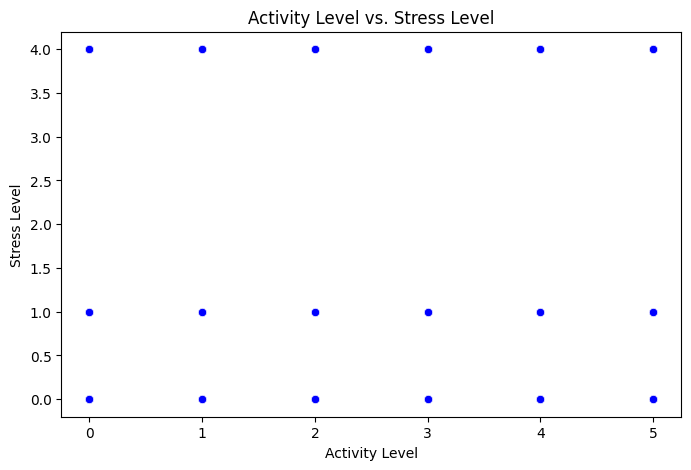

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Activity Level"], y=df["Stress Level"], color='blue')
plt.xlabel("Activity Level")
plt.ylabel("Stress Level")
plt.title("Activity Level vs. Stress Level")
plt.show()


<ipython-input-87-7cee037cfd0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Stress Level"], y=df["Activity Level"], palette="coolwarm")


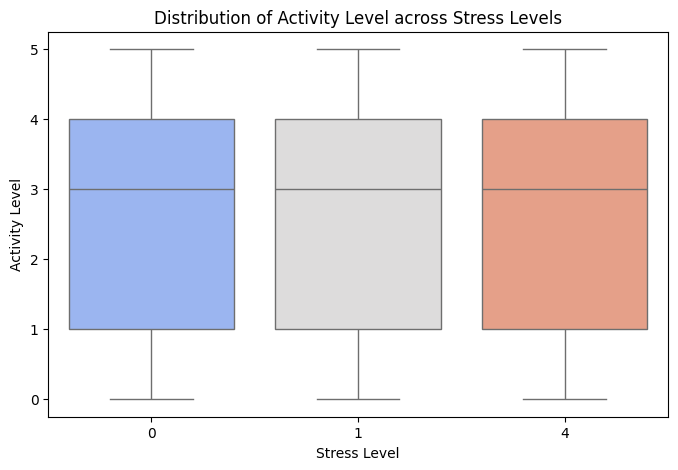

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Stress Level"], y=df["Activity Level"], palette="coolwarm")
plt.xlabel("Stress Level")
plt.ylabel("Activity Level")
plt.title("Distribution of Activity Level across Stress Levels")
plt.show()

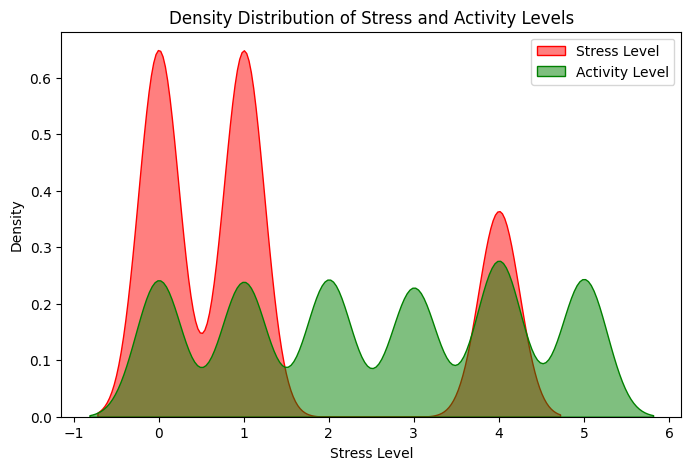

In [88]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Stress Level"], fill=True, color='red', label="Stress Level", alpha=0.5)
sns.kdeplot(df["Activity Level"], fill=True, color='green', label="Activity Level", alpha=0.5)
plt.legend()
plt.title("Density Distribution of Stress and Activity Levels")
plt.show()


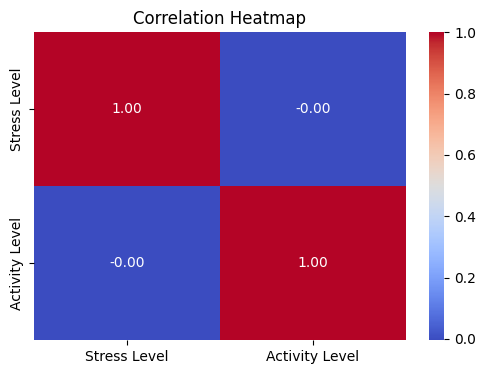

In [89]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Stress Level", "Activity Level"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()